In [1]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\data\processed\full_student_dataset.csv"
df = pd.read_csv(file_path)

# Check structure
print(df.info())
print(df['is_at_risk'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID No                 420 non-null    object 
 1   Prog Code             420 non-null    object 
 2   Gender                420 non-null    object 
 3   state_of_origin       420 non-null    object 
 4   residence_type        420 non-null    object 
 5   parental_education    372 non-null    object 
 6   internet_access       420 non-null    object 
 7   has_scholarship       420 non-null    object 
 8   waec_score            420 non-null    int64  
 9   jamb_score            420 non-null    int64  
 10  attendance_rate       420 non-null    int64  
 11  study_hours_per_week  420 non-null    int64  
 12  assignment_score_avg  420 non-null    int64  
 13  class_participation   420 non-null    object 
 14  CGPA400               420 non-null    float64
 15  CGPA300               4

In [2]:
df = df.drop(columns=['CGPA300', 'CGPA400','degree_class'])


In [3]:
# Convert labels to 0/1 if not already
df['is_at_risk'] = df['is_at_risk'].map({'No': 0, 'Yes': 1})


In [4]:
from sklearn.preprocessing import LabelEncoder

# Drop unneeded columns
df_model = df.drop(columns=['ID No', 'Prog Code'])

# Encode categorical columns
label_cols = df_model.select_dtypes(include=['object']).columns
for col in label_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# Separate features and target
X = df_model.drop('is_at_risk', axis=1)
y = df_model['is_at_risk']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Decision Tree trained.
SVM trained.
MLP trained.
Logistic Regression trained.


C:\Users\Olajide FemVrich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


📊 Model Evaluation Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.904762   0.875000  0.807692  0.840000
1                  SVM  0.690476   0.000000  0.000000  0.000000
2                  MLP  0.880952   0.785714  0.846154  0.814815
3  Logistic Regression  0.964286   0.960000  0.923077  0.941176


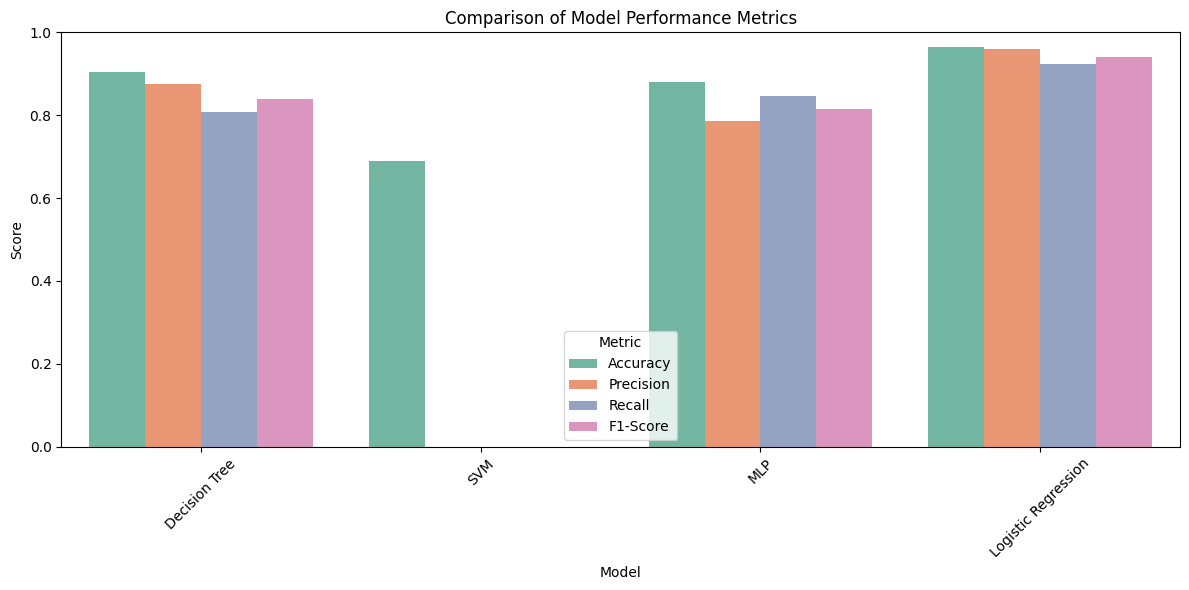

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation container
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, pos_label=1))
    results['Recall'].append(recall_score(y_test, y_pred, pos_label=1))
    results['F1-Score'].append(f1_score(y_test, y_pred, pos_label=1))

# Store in a DataFrame
results_df = pd.DataFrame(results)
print("📊 Model Evaluation Summary:")
print(results_df)

# Plot performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


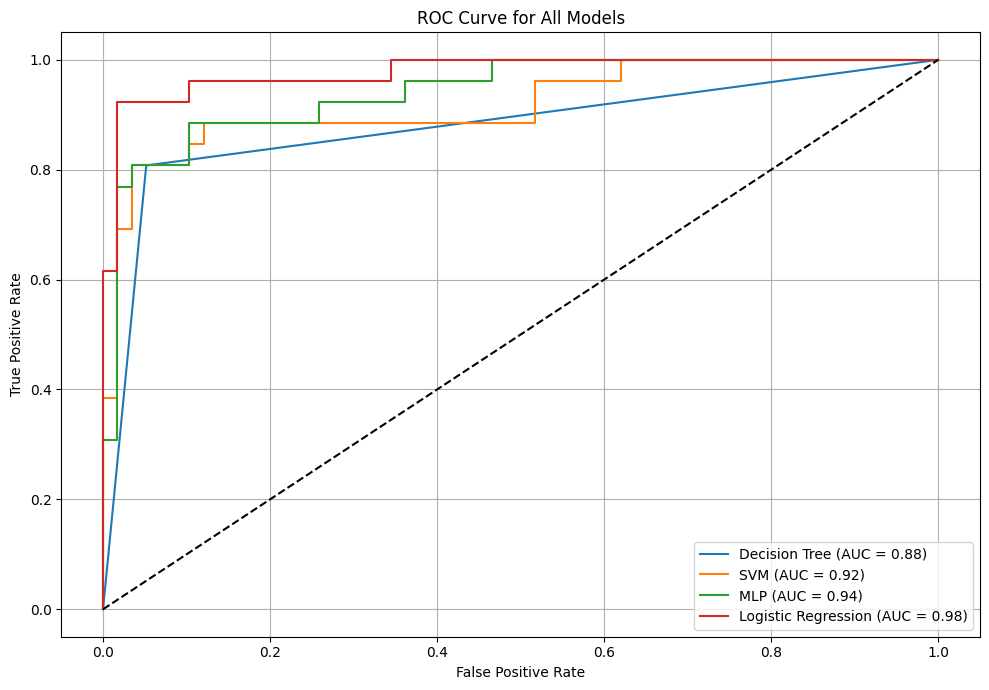

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Plot ROC Curves
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# ✅ Save ROC curve plot
plt.savefig(r'C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\visuals\roc_curve_comparison.png')

plt.show()


In [23]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Directory where you want to save the plots
visuals_dir = r'C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\visuals'

# Ensure the folder exists
os.makedirs(visuals_dir, exist_ok=True)

# Generate and save confusion matrix per model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, "classes_") else [0, 1])

    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.tight_layout()

    # Construct file-safe model name
    safe_model_name = name.lower().replace(" ", "_")
    save_path = os.path.join(visuals_dir, f'confusion_matrix_{safe_model_name}.png')
    plt.savefig(save_path)

    plt.close()  # Close the figure to avoid display in loops


C:\Users\Olajide FemVrich\AppData\Local\Temp\ipykernel_10236\3744960547.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette='viridis')


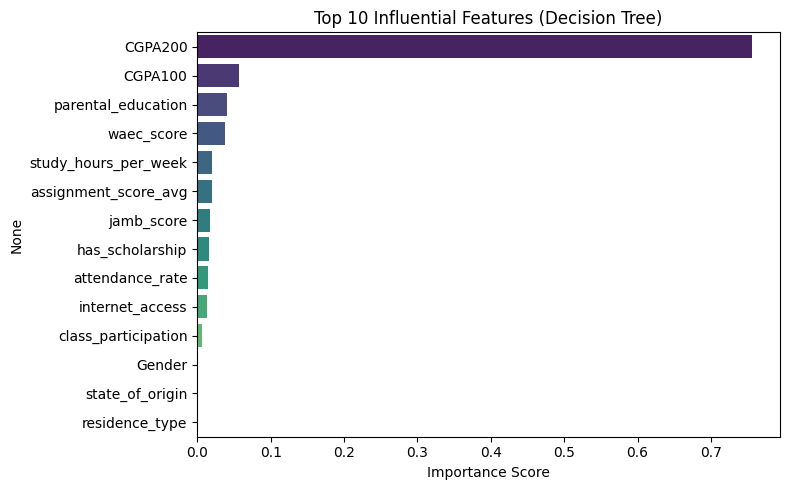

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Decision Tree
dt_model = models['Decision Tree']
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Top 10 Features
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title('Top 10 Influential Features (Decision Tree)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


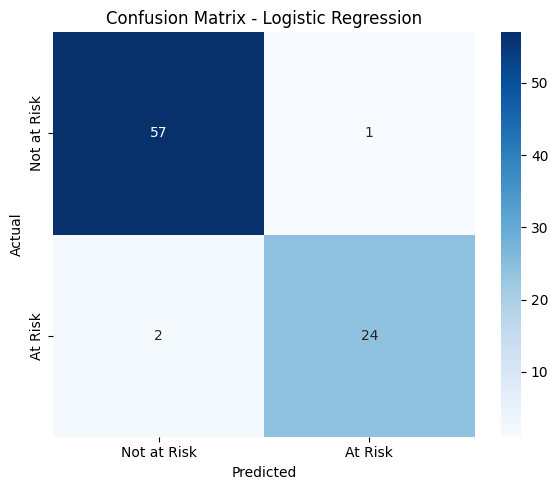

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create confusion matrix
cm = confusion_matrix(y_test, models['Logistic Regression'].predict(X_test))

# Create plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not at Risk', 'At Risk'],
            yticklabels=['Not at Risk', 'At Risk'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save to visuals folder
save_path = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\visuals\confusion_matrix_logistic_heatmap.png"
plt.savefig(save_path)

plt.show()


In [12]:
import numpy as np

# Add prediction column for analysis
df_test = X_test.copy()
df_test['actual'] = y_test
df_test['predicted'] = models['Logistic Regression'].predict(X_test)
df_test['gender'] = df.loc[df_test.index, 'Gender']  # add back gender

# Cross-tab by gender
print(df_test.groupby('gender')[['actual', 'predicted']].value_counts())


gender  actual  predicted
Female  0       0            31
        1       1            13
                0             1
Male    0       0            26
        1       1            11
        0       1             1
        1       0             1
Name: count, dtype: int64


In [13]:
# Dictionary mapping Nigerian states to geopolitical zones
state_zone_map = {
    'Lagos': 'South West', 'Oyo': 'South West', 'Osun': 'South West',
    'Ogun': 'South West', 'Ekiti': 'South West', 'Ondo': 'South West',
    'Anambra': 'South East', 'Enugu': 'South East', 'Imo': 'South East',
    'Abia': 'South East', 'Ebonyi': 'South East',
    'Kano': 'North West', 'Kaduna': 'North West', 'Katsina': 'North West',
    'Zamfara': 'North West', 'Sokoto': 'North West', 'Kebbi': 'North West', 'Jigawa': 'North West',
    'Benue': 'North Central', 'Niger': 'North Central', 'Kogi': 'North Central',
    'Kwara': 'North Central', 'Plateau': 'North Central', 'FCT': 'North Central',
    'Rivers': 'South South', 'Delta': 'South South', 'Edo': 'South South',
    'Bayelsa': 'South South', 'Akwa Ibom': 'South South', 'Cross River': 'South South',
    'Borno': 'North East', 'Adamawa': 'North East', 'Gombe': 'North East',
    'Yobe': 'North East', 'Taraba': 'North East', 'Bauchi': 'North East'
}


In [14]:
# Add zone info to test set
df_test['state_of_origin'] = df.loc[df_test.index, 'state_of_origin']
df_test['zone'] = df_test['state_of_origin'].map(state_zone_map)


In [15]:
# Group by zone and prediction results
zone_bias = df_test.groupby(['zone', 'actual', 'predicted']).size().unstack(fill_value=0)

print("📊 Prediction Breakdown by Zone:")
print(zone_bias)


📊 Prediction Breakdown by Zone:
predicted            0  1
zone        actual       
North West  0       18  0
            1        0  8
South East  0       15  1
            1        1  4
South South 0        9  0
            1        0  3
South West  0       15  0
            1        1  9


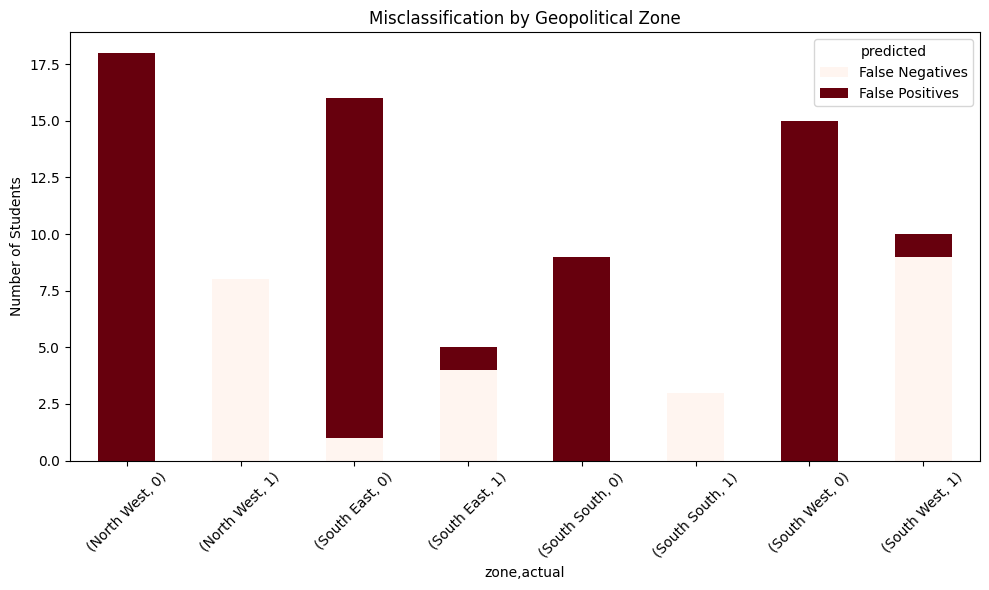

In [17]:
import matplotlib.pyplot as plt

# Calculate misclassification counts per zone
zone_bias['False Negatives'] = zone_bias.get(1, 0) - zone_bias.get((1,1), 0)
zone_bias['False Positives'] = zone_bias.get(0, 0) - zone_bias.get((0,0), 0)

zone_bias[['False Negatives', 'False Positives']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Reds')
plt.title('Misclassification by Geopolitical Zone')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
import joblib
import os

# Define your save path
model_dir = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_app\models"
os.makedirs(model_dir, exist_ok=True)

# Save Logistic Regression model from the dictionary
joblib.dump(models['Logistic Regression'], os.path.join(model_dir, 'logistic_model.pkl'))

# Save feature column names
joblib.dump(X.columns.tolist(), os.path.join(model_dir, 'feature_columns.pkl'))

print("✅ Model and features saved successfully.")


✅ Model and features saved successfully.


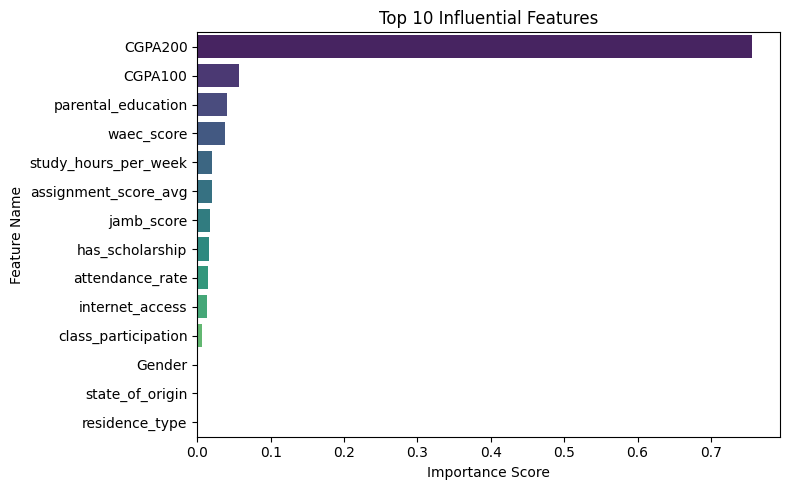

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_features,
    y=top_features.index,
    hue=top_features.index,         # use feature names as hue
    palette='viridis',
    legend=False                     # no legend needed
)

plt.title('Top 10 Influential Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')

plt.tight_layout()
plt.savefig(r'C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\visuals\feature_distribution.png')
plt.show()


📊 Model Evaluation Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.904762   0.875000  0.807692  0.840000
1                  SVM  0.690476   0.000000  0.000000  0.000000
2                  MLP  0.880952   0.785714  0.846154  0.814815
3  Logistic Regression  0.964286   0.960000  0.923077  0.941176


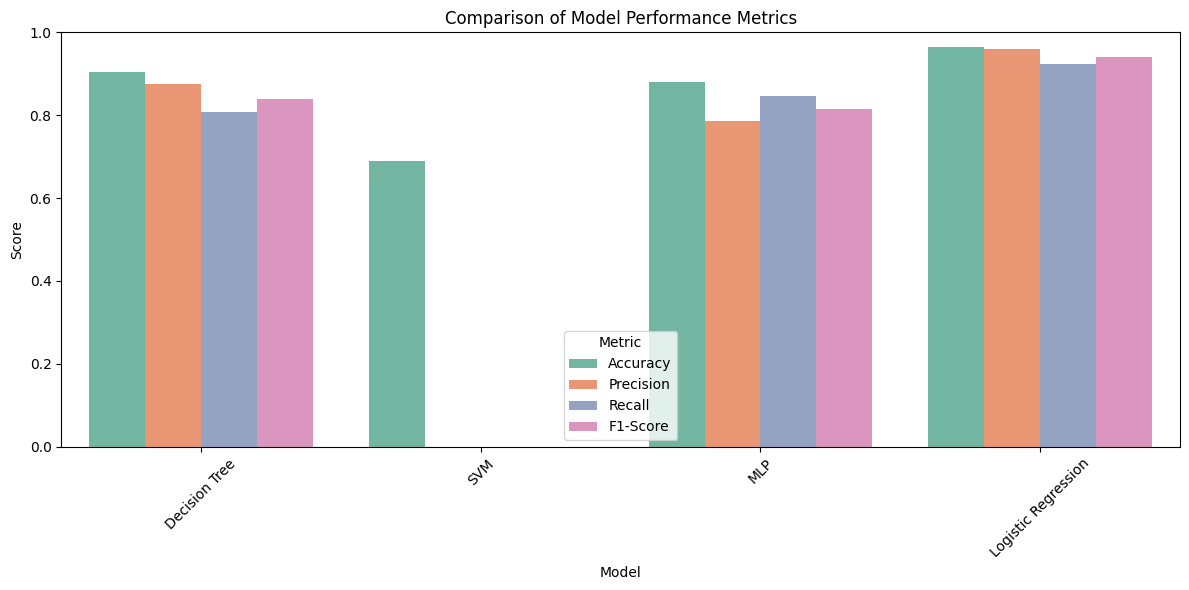

In [20]:
print("📊 Model Evaluation Summary:")
print(results_df)

# Plot performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()

# ✅ Save the chart to visuals folder
plt.savefig(r'C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\visuals\model_performance_comparison.png')

plt.show()

In [25]:
import pandas as pd

# Copy test set and add predictions and gender info
df_gender = X_test.copy()
df_gender['actual'] = y_test
df_gender['predicted'] = models['Logistic Regression'].predict(X_test)
df_gender['gender'] = df.loc[df_gender.index, 'Gender']

# Crosstab of predictions by gender
gender_crosstab = df_gender.groupby('gender')[['actual', 'predicted']].value_counts().unstack(fill_value=0)
print("📊 Gender-based Prediction Breakdown:\n")
print(gender_crosstab)


📊 Gender-based Prediction Breakdown:

predicted       0   1
gender actual        
Female 0       31   0
       1        1  13
Male   0       26   1
       1        1  11


In [27]:
# Copy test set and add ethnicity/zone info
df_ethnicity = X_test.copy()
df_ethnicity['actual'] = y_test
df_ethnicity['predicted'] = models['Logistic Regression'].predict(X_test)
df_ethnicity['zone'] = df.loc[df_ethnicity.index, 'state_of_origin']  # or 'Ethnicity'

# Crosstab of predictions by zone
zone_crosstab = df_ethnicity.groupby('zone')[['actual', 'predicted']].value_counts().unstack(fill_value=0)
print("📊 Zone-based Prediction Breakdown:\n")
print(zone_crosstab)


📊 Zone-based Prediction Breakdown:

predicted        0  1
zone    actual       
Anambra 0       15  1
        1        1  4
Kaduna  0       11  0
        1        0  5
Kano    0        7  0
        1        0  3
Lagos   0        8  0
        1        0  3
Oyo     0        7  0
        1        1  6
Rivers  0        9  0
        1        0  3


In [28]:
gender_accuracy = df_gender.groupby('gender').apply(
    lambda g: (g['actual'] == g['predicted']).mean()
)
print("\n✅ Gender-wise Accuracy:\n", gender_accuracy)



✅ Gender-wise Accuracy:
 gender
Female    0.977778
Male      0.948718
dtype: float64


In [29]:
zone_accuracy = df_ethnicity.groupby('zone').apply(
    lambda g: (g['actual'] == g['predicted']).mean()
)
print("\n✅ Zone-wise Accuracy:\n", zone_accuracy)



✅ Zone-wise Accuracy:
 zone
Anambra    0.904762
Kaduna     1.000000
Kano       1.000000
Lagos      1.000000
Oyo        0.928571
Rivers     1.000000
dtype: float64


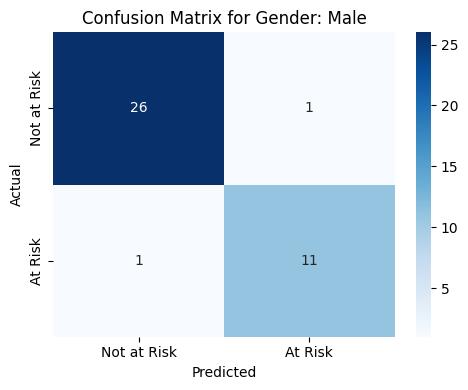

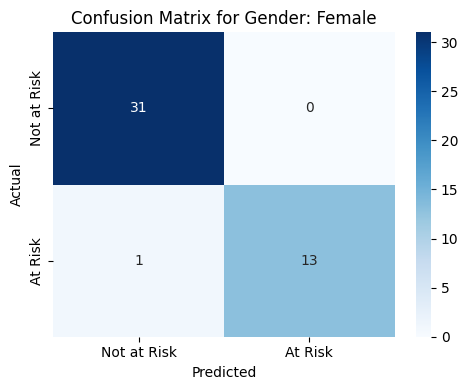

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for gender_group in df_gender['gender'].unique():
    subset = df_gender[df_gender['gender'] == gender_group]
    cm = confusion_matrix(subset['actual'], subset['predicted'])

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not at Risk', 'At Risk'],
                yticklabels=['Not at Risk', 'At Risk'])
    plt.title(f'Confusion Matrix for Gender: {gender_group}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
